# 0. 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

# 1. 데이터 불러오기

In [4]:
# 데이터 읽어오기
path = './data/simple_car_data.csv'
data = pd.read_csv(path)

# 2. 데이터 확인하기

In [5]:
# 상위 몇 개 행 확인
data.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [6]:
# 기술통계 확인
data.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


In [7]:
# NaN 값 확인
data.isnull().sum()

speed    0
dist     0
dtype: int64

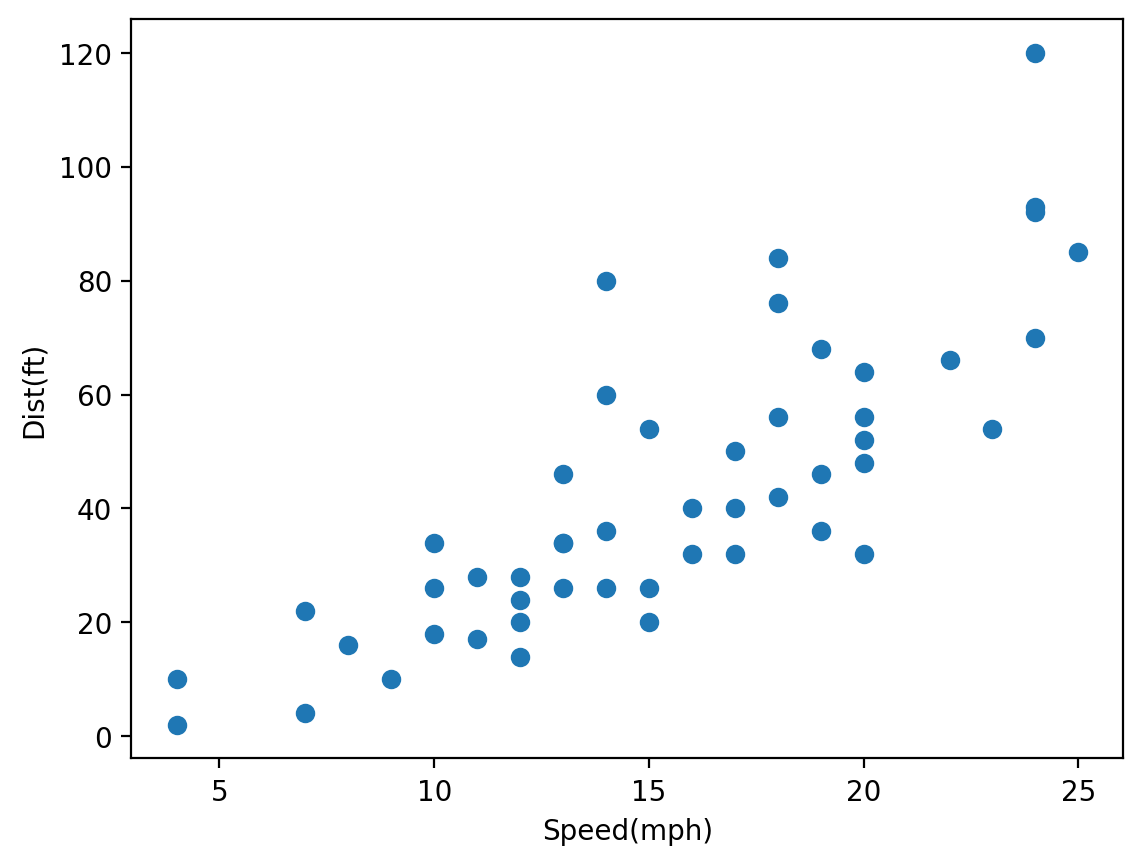

In [8]:
# speed, dist 관계
plt.scatter(x='speed', y='dist', data=data)
plt.xlabel('Speed(mph)')
plt.ylabel('Dist(ft)')
plt.show()

# 3. 데이터 준비하기

**1) x, y 분리**

- target 변수를 명확히 지정합니다.
- target을 제외한 변수를 x 데이터프레임으로 선언합니다.
- y 데이터프레임은 target 변수만을 가집니다.

In [9]:
# target 확인
target = 'dist'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

**2) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

In [10]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# 4. 모델링

In [11]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression

In [12]:
# 2단계: 선언하기
model = LinearRegression()

In [13]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LinearRegression()

In [14]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [15]:
# 5단계: 평가하기
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, y_pred))

15.113442990354987


### 회귀 계수 살펴보기

In [18]:
# 회귀계수 확인
print(list(x_train))
print(model.coef_) # 회귀계수(=가중치) 확인
print(model.intercept_) # 편향 수치 확인

['speed']
[3.91046344]
-16.373364149357656


$$ Distance = 3.91 * Speed -16.37$$